In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from scipy import stats
import pandas as pd
import pandas_datareader as web 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2022,1,1)

In [4]:
df_nifty=web.DataReader("^NSEI","yahoo",start,end)
df_nifty.head()

High           Low          Open         Close  Volume  \
Date                                                                         
2021-01-01  14049.849609  13991.349609  13996.099609  14018.500000  358100   
2021-01-04  14147.950195  13953.750000  14104.349609  14132.900391  495000   
2021-01-05  14215.599609  14048.150391  14075.150391  14199.500000  492500   
2021-01-06  14244.150391  14039.900391  14240.950195  14146.250000  632300   
2021-01-07  14256.250000  14123.099609  14253.750000  14137.349609  559200   

               Adj Close  
Date                      
2021-01-01  14018.500000  
2021-01-04  14132.900391  
2021-01-05  14199.500000  
2021-01-06  14146.250000  
2021-01-07  14137.349609

In [5]:
df_b=web.DataReader("M&M.NS","yahoo",start,end)
df_b.head()

High         Low   Open       Close     Volume   Adj Close
Date                                                                        
2021-01-01  744.750000  723.000000  725.0  732.450012  9543128.0  716.961609
2021-01-04  751.000000  727.250000  735.0  749.099976  4547027.0  733.259521
2021-01-05  748.000000  730.000000  748.0  740.099976  3551554.0  724.449829
2021-01-06  746.450012  730.450012  741.0  736.099976  3601608.0  720.534424
2021-01-07  755.000000  740.099976  743.0  744.400024  4063641.0  728.658936

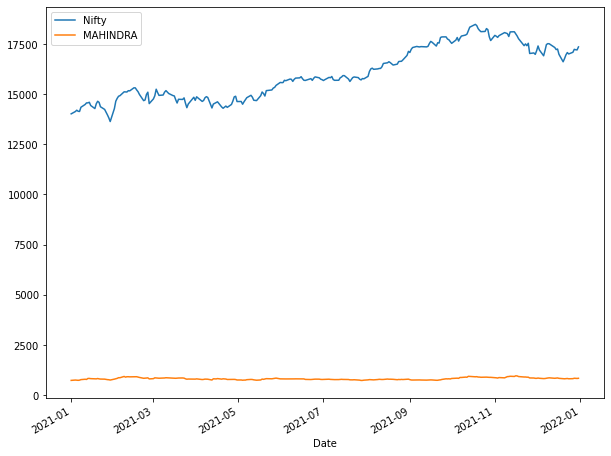

In [6]:
df_nifty['Close'].plot(label = 'Nifty', figsize=(10,8) )
df_b['Close'].plot(label = 'MAHINDRA')
plt.legend()

In [7]:
df_nifty['cum']=df_nifty["Close"]/df_nifty["Close"].iloc[0]
df_b['cum']=df_b["Close"]/df_b["Close"].iloc[0]


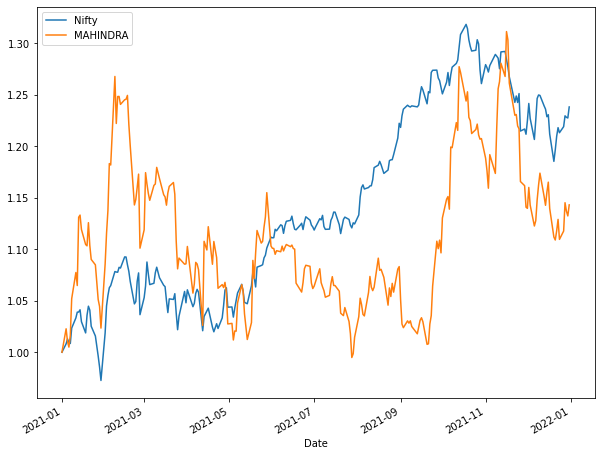

In [8]:
df_nifty['cum'].plot(label = 'Nifty', figsize=(10,8))
df_b['cum'].plot(label = 'MAHINDRA')
plt.legend()

In [9]:
df_nifty['daily_ret'] = df_nifty['Close'].pct_change(1)
df_b['daily_ret'] = df_b['Close'].pct_change(1)

In [10]:
plt.scatter(df_b['daily_ret'],df_nifty['daily_ret'])

In [11]:
LR = stats.linregress(df_b['daily_ret'].iloc[1:],df_nifty['daily_ret'].iloc[1:])
LR

LinregressResult(slope=0.28689878757048115, intercept=0.0007025289508417101, rvalue=0.5740918909816692, pvalue=4.696884219027904e-23, stderr=0.026141906286282445, intercept_stderr=0.0005161479613729538)

In [12]:
beta,alpha,r_val,p_val,std_err = LR

In [13]:
beta

0.28689878757048115

In [14]:
alpha

0.0007025289508417101

In [15]:
date=datetime.datetime(2022,7,19)

In [16]:
rm = (df_nifty['Close'].iloc[-1]-df_nifty['Close'].iloc[0])/df_nifty['Close'].iloc[0]
rm

0.2379392075650034

In [17]:
rf=0.055 #fd return of sbi taken as risk free return
rf

0.055

In [18]:
r_val

0.5740918909816692

In [19]:
p_val

4.696884219027904e-23

In [20]:
smb=0.15

In [21]:
hml=0.17

In [22]:

expected_return_capm= 1+beta*(rm-rf)
expected_return_capm

1.052485036849504

In [23]:
df_mah=web.DataReader("M&M.NS","yahoo",date,date)
df_mah

High   Low         Open    Close   Volume  Adj Close
Date                                                              
2022-07-19  1189.5  1161  1161.900024  1186.25  4056414    1186.25

In [24]:
actual_return=df_mah['Close'].iloc[0]/df_b['Close'].iloc[0]
actual_return

1.6195644483991074

In [25]:
err_capm=(actual_return-expected_return_capm)/actual_return
err_capm

0.35014315861906264

In [26]:
expected_return_fama=1+beta*(rm-rf)+r_val*smb+p_val*hml+alpha
expected_return_fama

1.139301349447596

In [27]:
err_fama=(expected_return_fama-actual_return)/actual_return
err_fama

-0.2965384300860873

In [28]:
# It can be seen that return in fama-french Three_Factor model is less than CAPM model.